## Importing and normalization of dataset

In [39]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the info method we can see that five of the features are represented by object datatypes, which means that we need to 

In [41]:
enc = preprocessing.OrdinalEncoder()
data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]] = enc.fit_transform(data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


## Creation of training and testing datasets

In [76]:
from keras.utils import to_categorical

X = np.array(data_scaled.drop(['HeartDisease'], 1))
y = np.array(data_scaled['HeartDisease'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

## Creation of NN model

In [83]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import Adam

def create_model(optimizer):
    # create model
    model = models.Sequential()
    model.add(layers.Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy','categorical_accuracy', 'mean_squared_error','mean_absolute_error'])
    return model

model = create_model('adam')
model.summary()

Model: "sequential_2017"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6051 (Dense)           (None, 16)                192       
_________________________________________________________________
dropout_4034 (Dropout)       (None, 16)                0         
_________________________________________________________________
dense_6052 (Dense)           (None, 8)                 136       
_________________________________________________________________
dropout_4035 (Dropout)       (None, 8)                 0         
_________________________________________________________________
dense_6053 (Dense)           (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [84]:
history=model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=150, batch_size=16)

Epoch 1/150
46/46 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.6921 - categorical_accuracy: 0.6921 - mean_squared_error: 0.2464 - mean_absolute_error: 0.4963 - val_loss: 0.6749 - val_accuracy: 0.7880 - val_categorical_accuracy: 0.7880 - val_mean_squared_error: 0.2405 - val_mean_absolute_error: 0.4902
Epoch 2/150
46/46 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.7793 - categorical_accuracy: 0.7793 - mean_squared_error: 0.2262 - mean_absolute_error: 0.4738 - val_loss: 0.6138 - val_accuracy: 0.7663 - val_categorical_accuracy: 0.7663 - val_mean_squared_error: 0.2102 - val_mean_absolute_error: 0.4526
Epoch 3/150
46/46 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.8065 - categorical_accuracy: 0.8065 - mean_squared_error: 0.1862 - mean_absolute_error: 0.4176 - val_loss: 0.5216 - val_accuracy: 0.7880 - val_categorical_accuracy: 0.7880 - val_mean_squared_error: 0.1675 - val_mean_absolute_error: 0.3853
E

Epoch 26/150
46/46 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8515 - categorical_accuracy: 0.8515 - mean_squared_error: 0.1140 - mean_absolute_error: 0.2386 - val_loss: 0.3962 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1197 - val_mean_absolute_error: 0.2420
Epoch 27/150
46/46 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8529 - categorical_accuracy: 0.8529 - mean_squared_error: 0.1141 - mean_absolute_error: 0.2360 - val_loss: 0.3814 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1140 - val_mean_absolute_error: 0.2390
Epoch 28/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8569 - categorical_accuracy: 0.8569 - mean_squared_error: 0.1144 - mean_absolute_error: 0.2394 - val_loss: 0.3859 - val_accuracy: 0.8587 - val_categorical_accuracy: 0.8587 - val_mean_squared_error: 0.1155 - val_mean_absolute_error: 0.244

46/46 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8583 - categorical_accuracy: 0.8583 - mean_squared_error: 0.1058 - mean_absolute_error: 0.2261 - val_loss: 0.3797 - val_accuracy: 0.8587 - val_categorical_accuracy: 0.8587 - val_mean_squared_error: 0.1131 - val_mean_absolute_error: 0.2273
Epoch 51/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8501 - categorical_accuracy: 0.8501 - mean_squared_error: 0.1095 - mean_absolute_error: 0.2242 - val_loss: 0.3859 - val_accuracy: 0.8478 - val_categorical_accuracy: 0.8478 - val_mean_squared_error: 0.1154 - val_mean_absolute_error: 0.2314
Epoch 52/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8569 - categorical_accuracy: 0.8569 - mean_squared_error: 0.1101 - mean_absolute_error: 0.2290 - val_loss: 0.3883 - val_accuracy: 0.8370 - val_categorical_accuracy: 0.8370 - val_mean_squared_error: 0.1166 - val_mean_absolute_error: 0.2307
Epoch 53/15

Epoch 75/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8638 - categorical_accuracy: 0.8638 - mean_squared_error: 0.1040 - mean_absolute_error: 0.2148 - val_loss: 0.3596 - val_accuracy: 0.8641 - val_categorical_accuracy: 0.8641 - val_mean_squared_error: 0.1045 - val_mean_absolute_error: 0.2182
Epoch 76/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8624 - categorical_accuracy: 0.8624 - mean_squared_error: 0.1081 - mean_absolute_error: 0.2231 - val_loss: 0.3592 - val_accuracy: 0.8641 - val_categorical_accuracy: 0.8641 - val_mean_squared_error: 0.1043 - val_mean_absolute_error: 0.2200
Epoch 77/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8638 - categorical_accuracy: 0.8638 - mean_squared_error: 0.1035 - mean_absolute_error: 0.2193 - val_loss: 0.3593 - val_accuracy: 0.8641 - val_categorical_accuracy: 0.8641 - val_mean_squared_error: 0.1046 - val_mean_absolute_error: 0.215

46/46 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8569 - categorical_accuracy: 0.8569 - mean_squared_error: 0.1052 - mean_absolute_error: 0.2138 - val_loss: 0.3685 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1070 - val_mean_absolute_error: 0.2120
Epoch 100/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8651 - categorical_accuracy: 0.8651 - mean_squared_error: 0.1037 - mean_absolute_error: 0.2159 - val_loss: 0.3795 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1109 - val_mean_absolute_error: 0.2209
Epoch 101/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8678 - categorical_accuracy: 0.8678 - mean_squared_error: 0.1020 - mean_absolute_error: 0.2128 - val_loss: 0.3596 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1035 - val_mean_absolute_error: 0.2087
Epoch 102

46/46 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8665 - categorical_accuracy: 0.8665 - mean_squared_error: 0.1021 - mean_absolute_error: 0.2084 - val_loss: 0.3770 - val_accuracy: 0.8478 - val_categorical_accuracy: 0.8478 - val_mean_squared_error: 0.1093 - val_mean_absolute_error: 0.2180
Epoch 124/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8665 - categorical_accuracy: 0.8665 - mean_squared_error: 0.0986 - mean_absolute_error: 0.2088 - val_loss: 0.3696 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1068 - val_mean_absolute_error: 0.2159
Epoch 125/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8638 - categorical_accuracy: 0.8638 - mean_squared_error: 0.1034 - mean_absolute_error: 0.2139 - val_loss: 0.3888 - val_accuracy: 0.8478 - val_categorical_accuracy: 0.8478 - val_mean_squared_error: 0.1131 - val_mean_absolute_error: 0.2186
Epoch 126

46/46 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8638 - categorical_accuracy: 0.8638 - mean_squared_error: 0.0994 - mean_absolute_error: 0.2033 - val_loss: 0.3757 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1068 - val_mean_absolute_error: 0.2114
Epoch 148/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8583 - categorical_accuracy: 0.8583 - mean_squared_error: 0.1013 - mean_absolute_error: 0.2054 - val_loss: 0.3701 - val_accuracy: 0.8533 - val_categorical_accuracy: 0.8533 - val_mean_squared_error: 0.1059 - val_mean_absolute_error: 0.2112
Epoch 149/150
46/46 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8678 - categorical_accuracy: 0.8678 - mean_squared_error: 0.0986 - mean_absolute_error: 0.2089 - val_loss: 0.3969 - val_accuracy: 0.8478 - val_categorical_accuracy: 0.8478 - val_mean_squared_error: 0.1142 - val_mean_absolute_error: 0.2145
Epoch 150

In [90]:
score=model.evaluate(X_test, y_test_categorical)

history.history.keys()

6/6 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8533 - categorical_accuracy: 0.8533 - mean_squared_error: 0.1050 - mean_absolute_error: 0.2066


dict_keys(['loss', 'accuracy', 'categorical_accuracy', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_accuracy', 'val_categorical_accuracy', 'val_mean_squared_error', 'val_mean_absolute_error'])

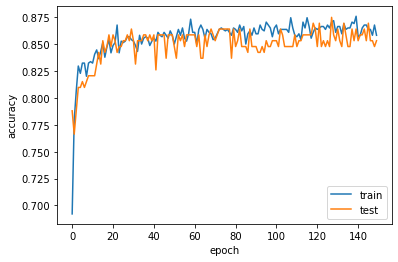

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

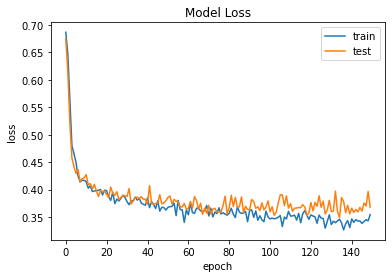

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [88]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred = np.round(model.predict(X_test)).astype(int)

print('Results for model')
print(accuracy_score(y_test_categorical, binary_pred))
print(classification_report(y_test_categorical, binary_pred))

Results for model
0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

   micro avg       0.85      0.85      0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184
 samples avg       0.85      0.85      0.85       184



## Improving model using GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = create_model)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [10, 50, 100, 150],
              'optimizer': ['adam', 'rmsprop', 'softmax', 'relu', 'sigmoid']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5,
                          verbose = 2)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=   1.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=   1.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=16, epochs=10, optimizer=adam; total time=   0.7s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=   0.8s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=16, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=16, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, opti

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=16, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=16, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=16, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=16, epochs=50, optimizer=adam; total time=   1.4s
[CV] END ...........batch_size=16, epochs=50, optimizer=adam; total time=   1.5s
[CV] END ...........batch_size=16, epochs=50, optimizer=adam; total time=   1.5s
[CV] END ...........batch_size=16, epochs=50, optimizer=adam; total time=   1.6s
[CV] END ...........batch_size=16, epochs=50, optimizer=adam; total time=   1.3s
[CV] END ........batch_size=16, epochs=50, optimizer=rmsprop; total time=   1.3s
[CV] END ........batch_size=16, epochs=50, optimizer=rmsprop; total time=   1.5s
[CV] END ........batch_size=16, epochs=50, optimizer=rmsprop; total time=   1.5s
[CV] END ........batch_size=16, epochs=50, optimizer=rmsprop; total time=   1.4s
[CV] END ........batch_size=16, epochs=50, optimizer=rmsprop; total time=   1.4s
[CV] END ........batch_size=16, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=16, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=16, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=50, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=16, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=16, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=16, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=16, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=16, epochs=100, optimizer=adam; total time=   2.0s
[CV] END ..........batch_size=16, epochs=100, optimizer=adam; total time=   5.2s
[CV] END ..........batch_size=16, epochs=100, optimizer=adam; total time=   2.1s
[CV] END ..........batch_size=16, epochs=100, optimizer=adam; total time=   2.1s
[CV] END ..........batch_size=16, epochs=100, optimizer=adam; total time=   2.0s
[CV] END .......batch_size=16, epochs=100, optimizer=rmsprop; total time=   2.1s
[CV] END .......batch_size=16, epochs=100, optimizer=rmsprop; total time=   2.1s
[CV] END .......batch_size=16, epochs=100, optimizer=rmsprop; total time=   2.1s
[CV] END .......batch_size=16, epochs=100, optimizer=rmsprop; total time=   2.1s
[CV] END .......batch_size=16, epochs=100, optimizer=rmsprop; total time=   2.1s
[CV] END .......batch_size=16, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=16, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=1

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=16, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=100, optimizer=relu; total time=   0.0s
[CV] END .......batch_size=16, epochs=100, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=16, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END ..........batch_size=16, epochs=150, optimizer=adam; total time=   2.8s
[CV] END ..........batch_size=16, epochs=150, optimizer=adam; total time=   2.9s
[CV] END ..........batch_size=16, epochs=150, optimizer=adam; total time=   2.8s
[CV] END ..........batch_size=16, epochs=150, optimizer=adam; total time=   2.9s
[CV] END ..........batch_size=16, epochs=150, optimizer=adam; total time=   2.9s
[CV] END .......batch_size=16, epochs=150, optimizer=rmsprop; total time=   2.9s
[CV] END .......batch_size=16, epochs=150, optimizer=rmsprop; total time=   2.9s
[CV] END .......batch_size=16, epochs=150, optimizer=rmsprop; total time=   3.0s
[CV] END .......batch_size=1

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=16, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=16, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=16, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=16, epochs=150, optimizer=relu; total time=   0.0s
[CV] END .......batch_size=16, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=16, epochs=150, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=16, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ...........batch_size=32, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ...........batch_size=32, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ...........batch_size=32, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ...........batch_size=32, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ...........batch_size=32, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ........batch_size=32, epochs=10, optimizer=rmsprop; total time=   0.6s
[CV] END ........batch_size=32, epochs=10, optimizer=rmsprop; total time=   0.6s
[CV] END ........batch_size=32, epochs=10, optimizer=rmsprop; total time=   0.6s
[CV] END ........batch_size=32, epochs=10, optimizer=rmsprop; total time=   0.6s
[CV] END ........batch_size=32, epochs=10, optimizer=rmsprop; total time=   0.6s
[CV] END ........batch_size=32, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=32, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=32, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=10, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=32, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=32, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=32, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ...........batch_size=32, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=32, epochs=50, optimizer=adam; total time=   2.5s
[CV] END ...........batch_size=32, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=32, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=32, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ........batch_size=32, epochs=50, optimizer=rmsprop; total time=   1.0s
[CV] END ........batch_size=32, epochs=50, optimizer=rmsprop; total time=   1.0s
[CV] END ........batch_size=32, epochs=50, optimizer=rmsprop; total time=   1.0s
[CV] END ........batch_size=32, epochs=50, optimizer=rmsprop; total time=   1.0s
[CV] END ........batch_size=32, epochs=50, optimizer=rmsprop; total time=   1.1s
[CV] END ........batch_size=32, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=32, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=32, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=50, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=32, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=32, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=32, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=32, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=32, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=32, epochs=100, optimizer=adam; total time=   1.7s
[CV] END ..........batch_size=32, epochs=100, optimizer=adam; total time=   1.5s
[CV] END ..........batch_size=32, epochs=100, optimizer=adam; total time=   1.5s
[CV] END ..........batch_size=32, epochs=100, optimizer=adam; total time=   1.4s
[CV] END ..........batch_size=32, epochs=100, optimizer=adam; total time=   1.3s
[CV] END .......batch_size=32, epochs=100, optimizer=rmsprop; total time=   1.4s
[CV] END .......batch_size=32, epochs=100, optimizer=rmsprop; total time=   1.4s
[CV] END .......batch_size=32, epochs=100, optimizer=rmsprop; total time=   1.4s
[CV] END .......batch_size=32, epochs=100, optimizer=rmsprop; total time=   1.4s
[CV] END .......batch_size=32, epochs=100, optimizer=rmsprop; total time=   1.4s
[CV] END .......batch_size=32, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=32, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=3

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=32, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=32, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=100, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=32, epochs=100, optimizer=relu; total time=   0.0s
[CV] END .......batch_size=32, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=100, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=32, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END ..........batch_size=32, epochs=150, optimizer=adam; total time=   1.8s
[CV] END ..........batch_size=32, epochs=150, optimizer=adam; total time=   1.9s
[CV] END ..........batch_size=32, epochs=150, optimizer=adam; total time=   1.8s
[CV] END ..........batch_size=32, epochs=150, optimizer=adam; total time=   1.9s
[CV] END ..........batch_size=32, epochs=150, optimizer=adam; total time=   3.3s
[CV] END .......batch_size=32, epochs=150, optimizer=rmsprop; total time=   1.9s
[CV] END .......batch_size=32, epochs=150, optimizer=rmsprop; total time=   1.9s
[CV] END .......batch_size=32, epochs=150, optimizer=rmsprop; total time=   2.0s
[CV] END .......batch_size=32, epochs=150, optimizer=rmsprop; total time=   1.9s
[CV] END .......batch_size=32, epochs=150, optimizer=rmsprop; total time=   2.4s
[CV] END .......batch_size=32, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=3

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=32, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=32, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=32, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=32, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=32, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=32, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=32, epochs=150, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=32, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=   0.5s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=   0.6s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=   3.5s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=   0.6s
[CV] END ...........batch_size=64, epochs=10, optimizer=adam; total time=   0.6s
[CV] END ........batch_size=64, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=64, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=64, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=64, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=64, epochs=10, optimizer=rmsprop; total time=   0.7s
[CV] END ........batch_size=64, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=64, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=64, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=10, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=64, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=64, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=64, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=64, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=64, epochs=50, optimizer=adam; total time=   0.8s
[CV] END ...........batch_size=64, epochs=50, optimizer=adam; total time=   0.9s
[CV] END ...........batch_size=64, epochs=50, optimizer=adam; total time=   0.7s
[CV] END ...........batch_size=64, epochs=50, optimizer=adam; total time=   0.8s
[CV] END ........batch_size=64, epochs=50, optimizer=rmsprop; total time=   0.8s
[CV] END ........batch_size=64, epochs=50, optimizer=rmsprop; total time=   0.9s
[CV] END ........batch_size=64, epochs=50, optimizer=rmsprop; total time=   0.9s
[CV] END ........batch_size=64, epochs=50, optimizer=rmsprop; total time=   0.9s


[CV] END ........batch_size=64, epochs=50, optimizer=rmsprop; total time=   0.8s
[CV] END ........batch_size=64, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=64, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ...........batch_size=64, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=50, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ...........batch_size=64, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ...........batch_size=64, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ........batch_size=64, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END ........batch_size=64, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=64, epochs=100, optimizer=adam; total time=   1.2s
[CV] END ..........batch_size=64, epochs=100, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=64, epochs=100, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=64, epochs=100, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=64, epochs=100, optimizer=adam; total time=   1.0s
[CV] END .......batch_size=64, epochs=100, optimizer=rmsprop; total time=   1.1s
[CV] END .......batch_size=64, epochs=100, optimizer=rmsprop; total time=   1.1s
[CV] END .......batch_size=64, epochs=100, optimizer=rmsprop; total time=   1.1s
[CV] END .......batch_size=64, epochs=100, optimizer=rmsprop; total time=   1.1s


[CV] END .......batch_size=64, epochs=100, optimizer=rmsprop; total time=   1.1s
[CV] END .......batch_size=64, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=100, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=64, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=100, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END ..........batch_size=64, epochs=150, optimizer=adam; total time=   1.4s
[CV] END ..........batch_size=64, epochs=150, optimizer=adam; total time=   1.4s
[CV] END ..........batch_size=64, epochs=150, optimizer=adam; total time=   1.4s
[CV] END ..........batch_size=64, epochs=150, optimizer=adam; total time=   1.4s
[CV] END ..........batch_size=64, epochs=150, optimizer=adam; total time=   1.3s
[CV] END .......batch_size=64, epochs=150, optimizer=rmsprop; total time=   3.1s
[CV] END .......batch_size=64, epochs=150, optimizer=rmsprop; total time=   4.7s
[CV] END .......batch_size=6

[CV] END .......batch_size=64, epochs=150, optimizer=rmsprop; total time=   3.6s
[CV] END .......batch_size=64, epochs=150, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=64, epochs=150, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=64, epochs=150, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=64, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=64, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=64, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=64, epochs=150, optimizer=relu; total time=   0.0s
[CV] END .......batch_size=64, epochs=150, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=150, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=64, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=64, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=10, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=10, optimizer=adam; total time=   1.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=adam; total time=   0.8s
[CV] END ..........batch_size=128, epochs=10, optimizer=adam; total time=   0.8s
[CV] END .......batch_size=128, epochs=10, optimizer=rmsprop; total time=   0.9s
[CV] END .......batch_size=128, epochs=10, optimizer=rmsprop; total time=   1.2s
[CV] END .......batch_size=128, epochs=10, optimizer=rmsprop; total time=   0.9s
[CV] END .......batch_size=128, epochs=10, optimizer=rmsprop; total time=   0.9s


[CV] END .......batch_size=128, epochs=10, optimizer=rmsprop; total time=   0.9s
[CV] END .......batch_size=128, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=128, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=128, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=10, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=128, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=128, epochs=10, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=10, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=128, epochs=50, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=50, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=50, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=50, optimizer=adam; total time=   1.1s
[CV] END ..........batch_size=128, epochs=50, optimizer=adam; total time=   1.1s
[CV] END .......batch_size=128, epochs=50, optimizer=rmsprop; total time=   1.2s
[CV] END .......batch_size=128, epochs=50, optimizer=rmsprop; total time=   0.8s
[CV] END .......batch_size=128, epochs=50, optimizer=rmsprop; total time=   0.7s
[CV] END .......batch_size=128, epochs=50, optimizer=rmsprop; total time=   0.7s


[CV] END .......batch_size=128, epochs=50, optimizer=rmsprop; total time=   0.7s
[CV] END .......batch_size=128, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=128, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=softmax; total time=   0.0s
[CV] END ..........batch_size=128, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=50, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ..........batch_size=128, epochs=50, optimizer=relu; total time=   0.0s
[CV] END ..........batch_size=128, epochs=50, optimizer=relu; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .......batch_size=128, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=sigmoid; total time=   0.0s
[CV] END .......batch_size=128, epochs=50, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=100, optimizer=adam; total time=   0.8s
[CV] END .........batch_size=128, epochs=100, optimizer=adam; total time=   0.8s
[CV] END .........batch_size=128, epochs=100, optimizer=adam; total time=   0.9s
[CV] END .........batch_size=128, epochs=100, optimizer=adam; total time=   0.9s
[CV] END .........batch_size=128, epochs=100, optimizer=adam; total time=   0.9s
[CV] END ......batch_size=128, epochs=100, optimizer=rmsprop; total time=   1.1s
[CV] END ......batch_size=128, epochs=100, optimizer=rmsprop; total time=   0.9s
[CV] END ......batch_size=128, epochs=100, optimizer=rmsprop; total time=   0.9s
[CV] END ......batch_size=128, epochs=100, optimizer=rmsprop; total time=   2.5s


[CV] END ......batch_size=128, epochs=100, optimizer=rmsprop; total time=   1.0s
[CV] END ......batch_size=128, epochs=100, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=softmax; total time=   0.2s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=softmax; total time=   0.2s
[CV] END ......batch_size=128, epochs=100, optimizer=softmax; total time=   0.1s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=100, optimizer=relu; total time=   0.2s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=100, optimizer=relu; total time=   0.1s
[CV] END .........batch_size=128, epochs=100, optimizer=relu; total time=   0.1s
[CV] END .........batch_size=128, epochs=100, optimizer=relu; total time=   0.1s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=100, optimizer=relu; total time=   0.0s
[CV] END ......batch_size=128, epochs=100, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=sigmoid; total time=   0.1s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=sigmoid; total time=   0.1s
[CV] END ......batch_size=128, epochs=100, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=100, optimizer=sigmoid; total time=   0.0s
[CV] END .........batch_size=128, epochs=150, optimizer=adam; total time=   2.9s
[CV] END .........batch_size=128, epochs=150, optimizer=adam; total time=   2.5s
[CV] END .........batch_size=128, epochs=150, optimizer=adam; total time=   1.7s
[CV] END .........batch_size=128, epochs=150, optimizer=adam; total time=   2.2s
[CV] END .........batch_size=128, epochs=150, optimizer=adam; total time=   1.8s
[CV] END ......batch_size=128, epochs=150, optimizer=rmsprop; total time=   2.3s
[CV] END ......batch_size=128, epochs=150, optimizer=rmsprop; total time=   1.8s
[CV] END ......batch_size=128, epochs=150, optimizer=rmsprop; total time=   1.8s
[CV] END ......batch_size=128, epochs=150, optimizer=rmsprop; total time=   1.8s


[CV] END ......batch_size=128, epochs=150, optimizer=rmsprop; total time=   1.8s
[CV] END ......batch_size=128, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=softmax; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=softmax; total time=   0.0s
[CV] END .........batch_size=128, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=150, optimizer=relu; total time=   0.0s
[CV] END .........batch_size=128, epochs=150, optimizer=relu; total time=   0.0s
[CV] END .........batch_size=128, epochs=150, optimizer=relu; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END .........batch_size=128, epochs=150, optimizer=relu; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=sigmoid; total time=   0.0s


C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lasse\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 157, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-68-fdfe07a3aec4>", line 17, in create_model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 541, in compile
    self.optimizer = self._get_optimizer(optimizer)
  File "C:\Users\lasse\anaconda3\lib\site-packages\tensorf

[CV] END ......batch_size=128, epochs=150, optimizer=sigmoid; total time=   0.0s
[CV] END ......batch_size=128, epochs=150, optimizer=sigmoid; total time=   0.0s


In [67]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters: " + str(best_parameters))
print("Best score: " + str(best_score))

Best parameters: {'batch_size': 16, 'epochs': 150, 'optimizer': 'adam'}
Best score: -0.20934979021549224
